Accuracy: 0.78


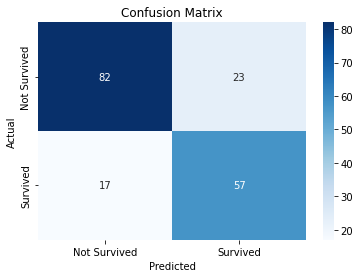

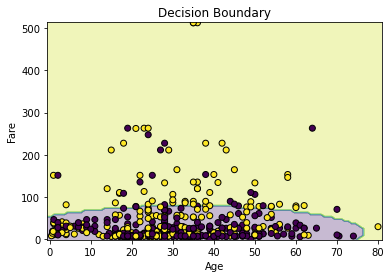

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset
data = pd.read_csv("Titanic-Dataset.csv")

# Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[features + ['Survived']]

# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting data into training and testing sets
X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred = nb_model.predict(X_test)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Boundary (For 2D visualization, using only 'Age' and 'Fare')
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Decision Boundary')
    plt.show()

X_train_2d = X_train[['Age', 'Fare']]
nb_model_2d = GaussianNB()
nb_model_2d.fit(X_train_2d, y_train)
plot_decision_boundary(nb_model_2d, X_train_2d, y_train)


Accuracy (MDL): 0.77


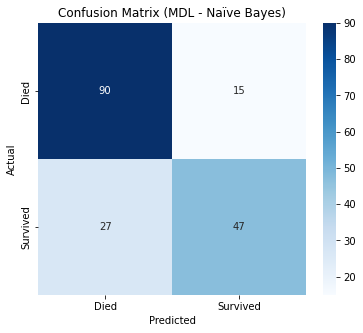

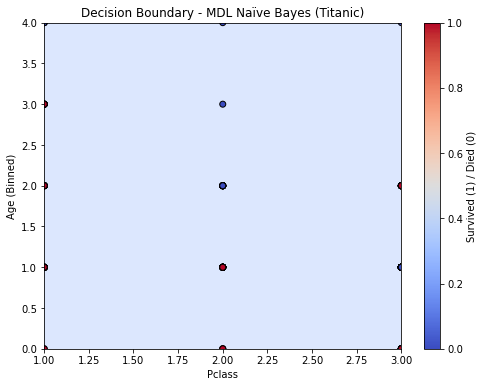

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Titanic dataset
data = pd.read_csv("Titanic-Dataset.csv")

# Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[features + ['Survived']]

# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Discretizing continuous features (Age and Fare)
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data[['Age', 'Fare']] = discretizer.fit_transform(data[['Age', 'Fare']]).astype(int)  # Convert to integers

# Convert all features to integer categories
X = data[features].astype(int)  
y = data['Survived']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Naïve Bayes classifier using CategoricalNB
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred = nb_model.predict(X_test)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (MDL): {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MDL - Naïve Bayes)')
plt.show()

# Decision Boundary Plot for Pclass vs Age
plt.figure(figsize=(8, 6))

# Create a mesh grid for visualization
x_min, x_max = X_train['Pclass'].min(), X_train['Pclass'].max()
y_min, y_max = X_train['Age'].min(), X_train['Age'].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max + 1, 1),  # Step size of 1 for discrete values
                     np.arange(y_min, y_max + 1, 1))

# Prepare a feature set for prediction with fixed values for other categorical features
fixed_values = X_train.mode().iloc[0].values  # Get the most common values
X_grid = np.c_[xx.ravel(), yy.ravel()]  # Use only Pclass and Age

# Expand the grid to match feature size by adding fixed values for other features
X_full = np.tile(fixed_values, (X_grid.shape[0], 1))  # Repeat mode values for each grid point
X_full[:, 0] = X_grid[:, 0]  # Assign varying Pclass values
X_full[:, 2] = X_grid[:, 1]  # Assign varying Age values

# Predict class for each point in mesh grid
Z = nb_model.predict(X_full)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test['Pclass'], X_test['Age'], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('Pclass')
plt.ylabel('Age (Binned)')
plt.title('Decision Boundary - MDL Naïve Bayes (Titanic)')
plt.colorbar(label="Survived (1) / Died (0)")
plt.show()
